# Data Scientist Test

## Import Libraries

In [213]:
#-------------------------------------------------------------------------------------------------
#=========================================
##         Import Dependencies          ##   
#=========================================

import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
# import scorecardpy as sc
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tqdm.notebook import tqdm
import re
import time
from time import sleep
import math
from datetime import date
from dateutil.relativedelta import relativedelta

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import ks_2samp
from scipy import stats
import pickle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from IPython.display import display

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
from scipy.stats import spearmanr

# from optbinning import BinningProcess
# from optbinning import Scorecard
# from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks, ScorecardMonitoring

#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import TomekLinks
#from imblearn.under_sampling import NearMiss
#from collections import Counter

# from skopt.space import Real, Integer, Categorical
# from skopt import BayesSearchCV
import joblib
# import shap

import plotly.graph_objs as go

### Pandas Config

In [214]:
#-------------------------------------------------------------------------------------------------
##              Pandas Config              
#=========================================

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.min_rows = 115

## Import Data

In [215]:
with open('data-sample.json', 'r') as file:
    data = json.load(file)
df = pd.json_normalize(data)
df_backup = df.copy()
data = df.copy()

In [216]:
df.shape

(8334, 18)

In [217]:
df.dtypes

taskCreatedTime                   object
taskAssignedTo                    object
taskCompletedTime                 object
taskStatus                        object
flow                              object
taskId                            object
taskLocationDone.lon             float64
taskLocationDone.lat             float64
cod.amount                       float64
cod.received                      object
UserVar.branch_dest               object
UserVar.taskStatusLabel           object
UserVar.receiver_city             object
UserVar.taskDetailStatusLabel     object
UserVar.taskDetailStatus          object
UserVar.weight                    object
UserVar.branch_origin             object
UserVar.taskStatus                object
dtype: object

In [218]:
df.head(5)

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01


### Transform Column into Its Proper Data Type

#### Datetime Transform

In [219]:
df.dtypes

taskCreatedTime                   object
taskAssignedTo                    object
taskCompletedTime                 object
taskStatus                        object
flow                              object
taskId                            object
taskLocationDone.lon             float64
taskLocationDone.lat             float64
cod.amount                       float64
cod.received                      object
UserVar.branch_dest               object
UserVar.taskStatusLabel           object
UserVar.receiver_city             object
UserVar.taskDetailStatusLabel     object
UserVar.taskDetailStatus          object
UserVar.weight                    object
UserVar.branch_origin             object
UserVar.taskStatus                object
dtype: object

In [220]:
df.head(5)

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01


#### Float64 Transform

In [221]:
df['UserVar.weight'] = pd.to_numeric(df['UserVar.weight'])

In [222]:
df.dtypes

taskCreatedTime                   object
taskAssignedTo                    object
taskCompletedTime                 object
taskStatus                        object
flow                              object
taskId                            object
taskLocationDone.lon             float64
taskLocationDone.lat             float64
cod.amount                       float64
cod.received                      object
UserVar.branch_dest               object
UserVar.taskStatusLabel           object
UserVar.receiver_city             object
UserVar.taskDetailStatusLabel     object
UserVar.taskDetailStatus          object
UserVar.weight                   float64
UserVar.branch_origin             object
UserVar.taskStatus                object
dtype: object

In [223]:
# Calculate the count of null values in each column
null_counts = df.isnull().sum()

# Print the count of null values
print(null_counts)

taskCreatedTime                     0
taskAssignedTo                      1
taskCompletedTime                 768
taskStatus                          0
flow                                0
taskId                              0
taskLocationDone.lon              768
taskLocationDone.lat              768
cod.amount                       5976
cod.received                     5976
UserVar.branch_dest                 0
UserVar.taskStatusLabel           762
UserVar.receiver_city              52
UserVar.taskDetailStatusLabel     762
UserVar.taskDetailStatus          762
UserVar.weight                      0
UserVar.branch_origin             293
UserVar.taskStatus                762
dtype: int64


In [224]:
df.head(5)

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.000,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.300,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01


## EDA for Data

### Categorical Variable

In [225]:
object_col = df.select_dtypes(include=['object']).columns.tolist()
object_col.sort()
object_col.remove('taskCreatedTime')
object_col.remove('taskCompletedTime')
object_col.remove('taskId')
object_col

['UserVar.branch_dest',
 'UserVar.branch_origin',
 'UserVar.receiver_city',
 'UserVar.taskDetailStatus',
 'UserVar.taskDetailStatusLabel',
 'UserVar.taskStatus',
 'UserVar.taskStatusLabel',
 'cod.received',
 'flow',
 'taskAssignedTo',
 'taskStatus']

#### Check Each Categorical Unique Value Count

In [226]:
# Create an empty DataFrame to store the unique value counts summary
summary_df = pd.DataFrame(columns=['Column', 'Unique_Value_Count'])

# Iterate over the object columns
for column in object_col:
    unique_values_count = df[column].nunique()
    summary_df = pd.concat([summary_df, pd.DataFrame({'Column': [column], 'Unique_Value_Count': [unique_values_count]})])

# Reset the index of the summary DataFrame
summary_df = summary_df.reset_index(drop=True)

# Print the summary DataFrame
summary_df

,Column,Unique_Value_Count
0,UserVar.branch_dest,62
1,UserVar.branch_origin,59
2,UserVar.receiver_city,1830
3,UserVar.taskDetailStatus,31
4,UserVar.taskDetailStatusLabel,31
5,UserVar.taskStatus,2
6,UserVar.taskStatusLabel,2
7,cod.received,2
8,flow,1
9,taskAssignedTo,2787


From the unique value count in object column, we will exclude UserVar.receiver_city, flow and taskAssignedTo for EDA, because too many unique values or only 1 value

In [227]:
object_col.remove('UserVar.receiver_city')
object_col.remove('taskAssignedTo')
object_col.remove('flow')
object_col

['UserVar.branch_dest',
 'UserVar.branch_origin',
 'UserVar.taskDetailStatus',
 'UserVar.taskDetailStatusLabel',
 'UserVar.taskStatus',
 'UserVar.taskStatusLabel',
 'cod.received',
 'taskStatus']

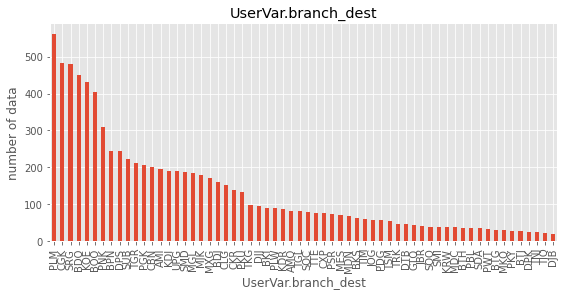

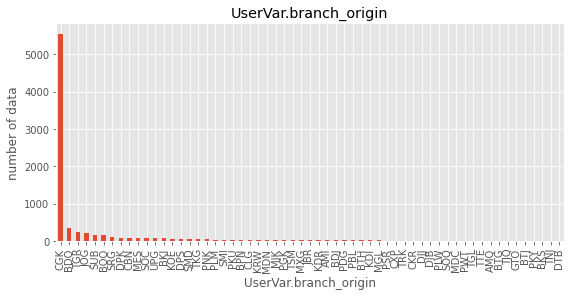

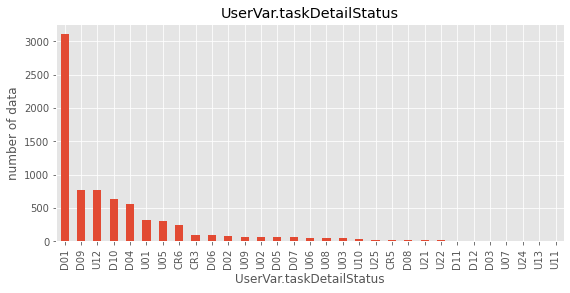

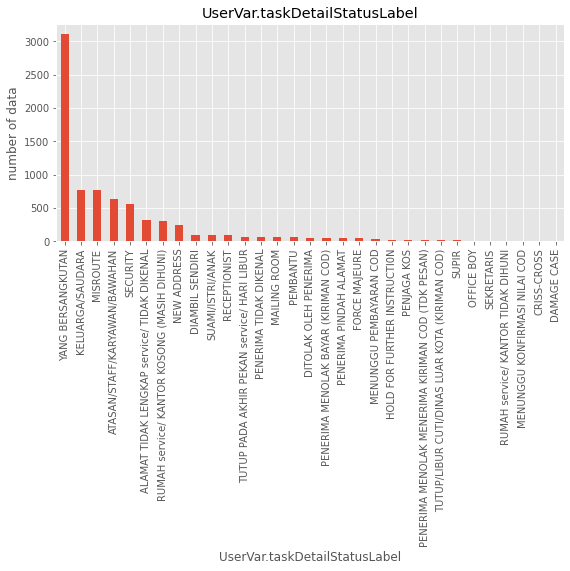

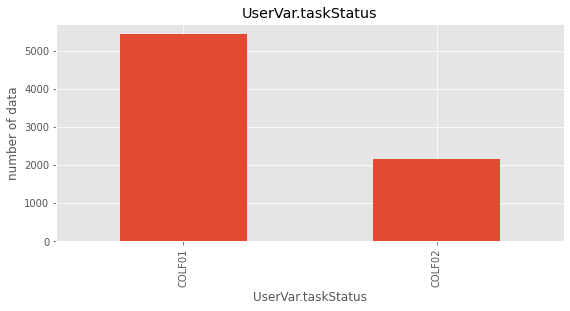

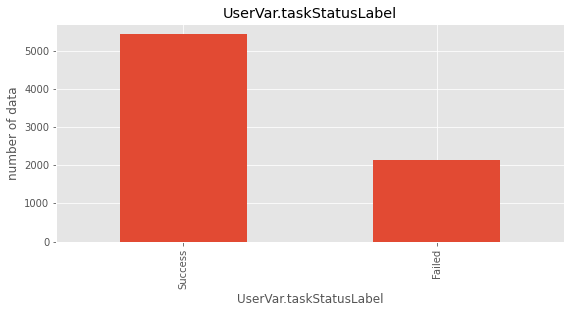

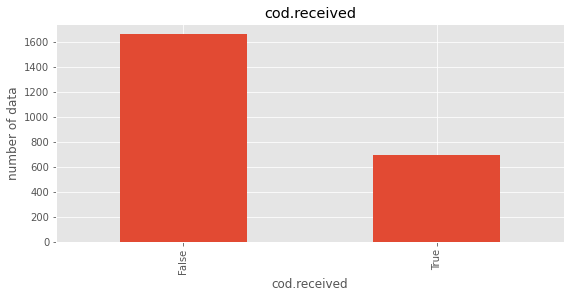

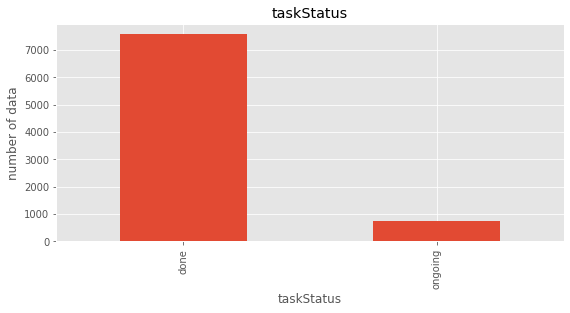

In [228]:
# indentifying the categorical variables
cat_var= data[object_col]

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of data")
    plt.title(column)

Remove UserVar.taskDetailStatus, UserVar.taskDetailStatusLabel, and UserVar.taskStatus

In [229]:
object_col.remove('UserVar.taskDetailStatus')
object_col.remove('UserVar.taskDetailStatusLabel')
object_col.remove('UserVar.taskStatus')

In [230]:
object_col

['UserVar.branch_dest',
 'UserVar.branch_origin',
 'UserVar.taskStatusLabel',
 'cod.received',
 'taskStatus']

Make a new feature based on UserVar.brach_origin because imbalanced value. If the value is 'CGK' then 1, else 0

In [231]:
# Create a new column based on the values of "UserVar.branch_origin"
df['is_cgk'] = np.where(df['UserVar.branch_origin'] == 'CGK', 1, 0)

Change (done/ongoing), (True/False), and (Success/Failed) column into (1/0) value from UserVar.taskStatusLabel, cod.received, and taskStatus

In [232]:
# Using map() function
df['UserVar.taskStatusLabel'] = df['UserVar.taskStatusLabel'].map({'Failed': 1, 'Success': 0})
df['taskStatus'] = df['taskStatus'].map({'ongoing': 0, 'done': 1})

In [233]:
df.head(3)

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,is_cgk
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,1,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,0.0,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.0,CGK,COLF01,1
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,1,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,0.0,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01,1
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,1,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,0.0,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.0,CGK,COLF01,1


Remove UserVar.taskStatusLabel, cod.received, and taskStatus from list of object column, because they've already become numerical column

In [234]:
object_col.remove('UserVar.taskStatusLabel')
object_col.remove('taskStatus')

In [235]:
object_col

['UserVar.branch_dest', 'UserVar.branch_origin', 'cod.received']

We will use data that has taskStatus done / taskStatus = 1

In [236]:
df_done = df.copy()
df_done = df_done.loc[df_done['taskStatus'] == 1]

We will make days diff between taskCompletedTime and taskCreatedTime as a new numerical feature

In [237]:
# Specify the format of the datetime values
date_format = "%Y-%m-%d %H:%M:%S%z"

# Convert the 'taskCompletedTime' column to datetime type
df_done['taskCompletedTime'] = pd.to_datetime(df_done['taskCompletedTime'], format='mixed', utc=True)
df_done['taskCreatedTime'] = pd.to_datetime(df_done['taskCreatedTime'], format='mixed', utc=True)

# Convert the columns to datetime type
df_done['taskCreatedTime'] = pd.to_datetime(df_done['taskCreatedTime'])
df_done['taskCompletedTime'] = pd.to_datetime(df_done['taskCompletedTime'])

# Calculate the time difference in days
df_done['TimeDifference'] = (df_done['taskCompletedTime'] - df_done['taskCreatedTime']).dt.total_seconds() / 3600

In [238]:
df_done['TimeDifference'].describe()

count    7566.000000
mean        1.213988
std         1.681328
min         0.004167
25%         0.166597
50%         0.620972
75%         1.368681
max        13.266667
Name: TimeDifference, dtype: float64

### Numerical Variable

In [239]:
num_col = df_done.select_dtypes(include=['float64','int64','int32']).columns.tolist()
num_col.sort()
num_col

['TimeDifference',
 'UserVar.taskStatusLabel',
 'UserVar.weight',
 'cod.amount',
 'is_cgk',
 'taskLocationDone.lat',
 'taskLocationDone.lon',
 'taskStatus']

drop taskStatus, because we know that the value will be 1

In [240]:
num_col.remove('taskStatus')

In [241]:
num_col

['TimeDifference',
 'UserVar.taskStatusLabel',
 'UserVar.weight',
 'cod.amount',
 'is_cgk',
 'taskLocationDone.lat',
 'taskLocationDone.lon']

### Feature vs Result Label (UserVar.taskStatusLabel)

In [242]:
plot2 = object_col + num_col
plot2.sort()
plot2

['TimeDifference',
 'UserVar.branch_dest',
 'UserVar.branch_origin',
 'UserVar.taskStatusLabel',
 'UserVar.weight',
 'cod.amount',
 'cod.received',
 'is_cgk',
 'taskLocationDone.lat',
 'taskLocationDone.lon']

In [243]:
data = df_done.copy()

In [244]:
data.columns

Index(['taskCreatedTime', 'taskAssignedTo', 'taskCompletedTime', 'taskStatus',
       'flow', 'taskId', 'taskLocationDone.lon', 'taskLocationDone.lat',
       'cod.amount', 'cod.received', 'UserVar.branch_dest',
       'UserVar.taskStatusLabel', 'UserVar.receiver_city',
       'UserVar.taskDetailStatusLabel', 'UserVar.taskDetailStatus',
       'UserVar.weight', 'UserVar.branch_origin', 'UserVar.taskStatus',
       'is_cgk', 'TimeDifference'],
      dtype='object')

In [245]:
# Calculate the count of null values in each column
null_counts = data[plot2].isnull().sum()

# Print the count of null values
print(null_counts)

TimeDifference                6
UserVar.branch_dest           0
UserVar.branch_origin       279
UserVar.taskStatusLabel       0
UserVar.weight                0
cod.amount                 5598
cod.received               5598
is_cgk                        0
taskLocationDone.lat          6
taskLocationDone.lon          6
dtype: int64


In [246]:
data = data[plot2]

Change column name to eliminate name like UserVar

In [247]:
# Define the column name mapping dictionary
column_mapping = {
    'TimeDifference': 'timeDiff',
    'UserVar.branch_dest': 'branch_dest',
    'UserVar.branch_origin': 'branch_origin',
    'UserVar.taskStatusLabel': 'taskStatusLabel',
    'UserVar.weight': 'weight',
    'cod.amount': 'amount_cod',
    'cod.received': 'received_cod',
    'taskLocationDone.lat': 'lat',
    'taskLocationDone.lon': 'lon'
}

# Rename the columns using the mapping dictionary
data = data.rename(columns=column_mapping)

In [248]:
data.columns

Index(['timeDiff', 'branch_dest', 'branch_origin', 'taskStatusLabel', 'weight',
       'amount_cod', 'received_cod', 'is_cgk', 'lat', 'lon'],
      dtype='object')

In [249]:
data.dtypes

timeDiff           float64
branch_dest         object
branch_origin       object
taskStatusLabel    float64
weight             float64
amount_cod         float64
received_cod        object
is_cgk               int32
lat                float64
lon                float64
dtype: object

In [250]:
data['received_cod'] = data['received_cod'].astype('str')

In [251]:
data['received_cod'].unique()

array(['True', 'nan', 'False'], dtype=object)

We will make a new feature based on received_cod, where nan will become 0 and other will become 1 (to check whether the deliveries using COD or not)

In [252]:
data['is_cod'] = data['received_cod'].fillna('nan').map({'nan': 0, 'True': 1, 'False': 1})

In [253]:
data['taskStatusLabel'] = data['taskStatusLabel'].astype(int)

In [254]:
data.head(5)

,timeDiff,branch_dest,branch_origin,taskStatusLabel,weight,amount_cod,received_cod,is_cgk,lat,lon,is_cod
0,0.484444,SRG,CGK,0,13.000,685000.0,True,1,-6.926608,109.762910,1
1,3.878056,MGL,CGK,0,1.300,53500.0,True,1,-7.876154,110.033986,1
2,5.013889,MGL,CGK,0,3.000,179500.0,True,1,-7.849777,109.999733,1
3,9.620000,MGL,CGK,0,0.625,31815.0,True,1,-7.710998,110.003708,1
4,2.178333,MGL,CGK,0,3.000,144562.0,True,1,-7.829742,110.013887,1


In [255]:
data_backup = data.copy()

In [256]:
plot = ['branch_dest','branch_origin','weight','is_cod','amount_cod','received_cod','lat','lon','timeDiff','is_cgk','taskStatusLabel']

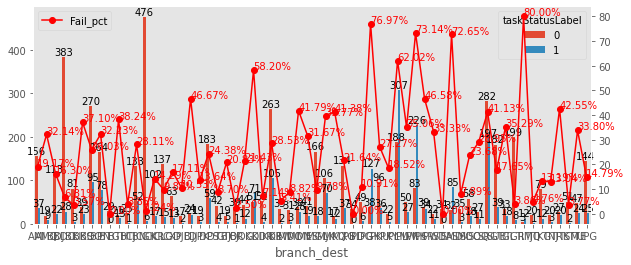

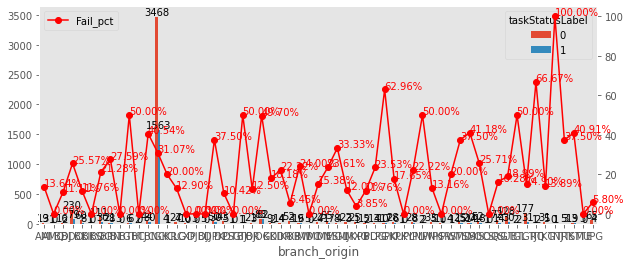

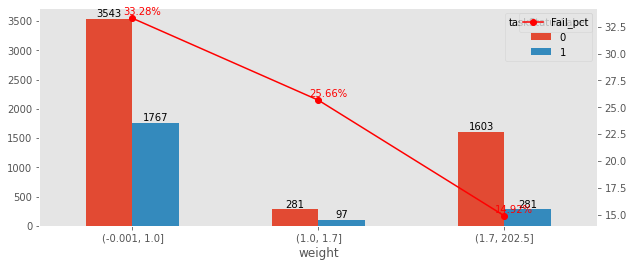

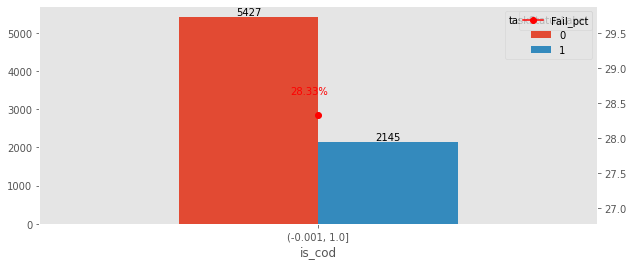

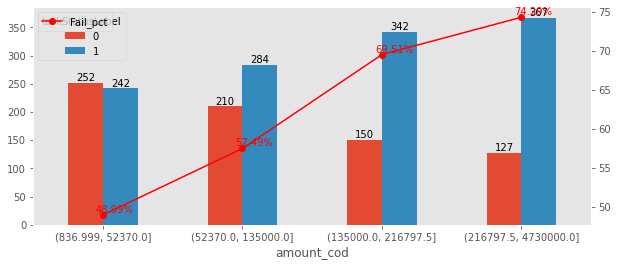

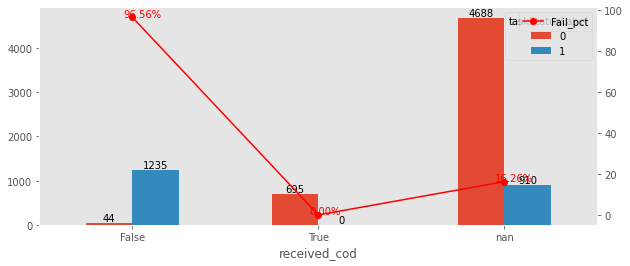

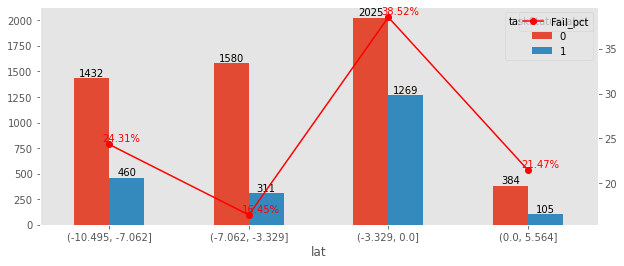

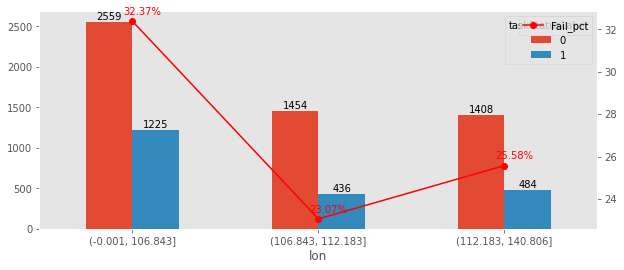

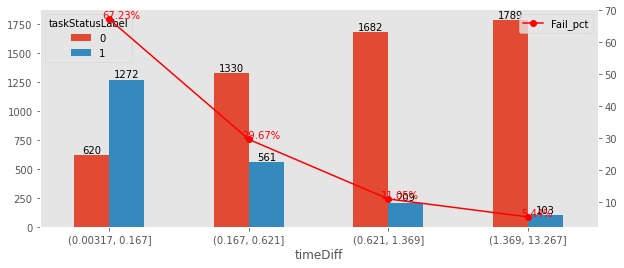

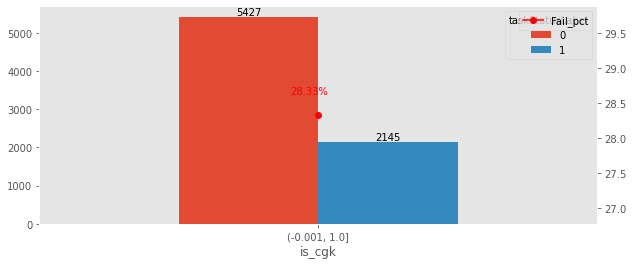

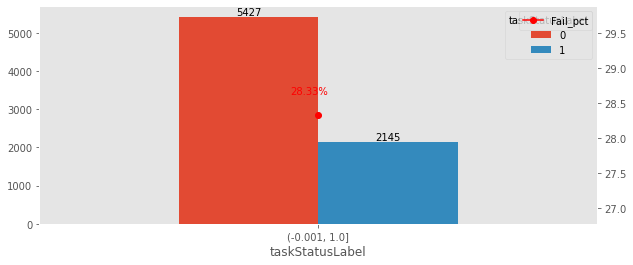

In [257]:
# Iterate over all columns in data
for col in plot:
    # Check if the column is numerical or categorical
    if data[col].dtype == 'O':
        # Create a new DataFrame with column and label columns
        df_grouped = data[[col, 'taskStatusLabel']]
 
        # Group the DataFrame by column and label
        df_grouped = df_grouped.groupby([col, 'taskStatusLabel']).size().reset_index(name='count')
 
        # Pivot the DataFrame to create separate columns for Fail and Fail counts
        df_pivot = df_grouped.pivot(index=col, columns='taskStatusLabel', values='count').fillna(0)
 
        # Compute the percentage of Fail loans
        df_pivot['Fail_pct'] = (df_pivot[1] / (df_pivot[1] + df_pivot[0])) * 100
 
        # Reset the index
        df_pivot = df_pivot.reset_index()
 
        # Create a figure with a single subplot
        fig, ax = plt.subplots(figsize=(10,4))
 
        # Create a bar plot of "Fail" and "Fail" counts by "column"
        df_pivot.plot(kind='bar', x=col, y=[0, 1], ax=ax)
 
        # Set labels and title for the plot
        ax.set_xlabel(col)
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
 
        # Create a line plot of percentage of "Fail" values by "column"
        ax2 = ax.twinx()
        df_pivot.plot(kind='line', x=col, y='Fail_pct', color='red', ax=ax2, marker='o')
 
        # Show the count of each bar
        for i in ax.containers:
            ax.bar_label(i, label_type='edge', fontsize=10)
 
 
        # Show the value in every data point of the line chart
        for i, v in enumerate(df_pivot['Fail_pct']):
            ax2.text(i - 0.05, v + 0.3, f'{v:.2f}%', color='red')
 
        # remove the grid
        ax.grid(False)  
        ax2.grid(False)
 
        # Save the plot to a file
        # plt.savefig(f'plots2/{col}.png')
 
 
 
    else:
        # Bin the column into 5 equally spaced bins
        data[f'{col}_bin'] = pd.qcut(data[col],q=4, duplicates='drop')
 
        # Create a new DataFrame with column_bin and label columns
        df_grouped = data[[f'{col}_bin', 'taskStatusLabel']]
 
        # Group the DataFrame by column_bin and label
        df_grouped = df_grouped.groupby([f'{col}_bin', 'taskStatusLabel']).size().reset_index(name='count')
 
        # Pivot the DataFrame to create separate columns for Fail and Fail counts
        df_pivot = df_grouped.pivot(index=f'{col}_bin', columns='taskStatusLabel', values='count').fillna(0)
 
        # Compute the percentage of Fail loans
        df_pivot['Fail_pct'] = (df_pivot[1] / (df_pivot[1] + df_pivot[0])) * 100
 
        # Reset the index
        df_pivot = df_pivot.reset_index()
 
        # Create a figure with a single subplot
        fig, ax = plt.subplots(figsize=(10,4))
 
        # Create a bar plot of "Fail" and "Fail" counts by "column_bin"
        df_pivot.plot(kind='bar', x=f'{col}_bin', y=[0, 1], ax=ax)
 
        # Set labels and title for the plot
        ax.set_xlabel(col)
        ax.set_xticklabels(ax.get_xticks(), rotation = 0)
 
        # Create a line plot of percentage of "Fail" values by "column_bin"
        ax2 = ax.twinx()
        df_pivot.plot(kind='line', x=f'{col}_bin', y='Fail_pct', color='red', ax=ax2, marker='o')
 
        # Show the count of each bar
        for i in ax.containers:
            ax.bar_label(i, label_type='edge', fontsize=10)
 
        # Show the value in every data point of the line chart
        for i, v in enumerate(df_pivot['Fail_pct']):
            ax2.text(i - 0.05, v + 0.3, f'{v:.2f}%', color='red')
 
        # Remove the grid
        ax.grid(False)  
        ax2.grid(False)
 
        # Save the plot to a file
        # plt.savefig(f'plots2/{col}.png')
 
    # Show the plot
    plt.show()

## Feature Selection

### Using t-test for Numerical Value

In [258]:
from scipy.stats import ttest_ind
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = data_backup.copy()
raw_data = raw_data[plot]
raw_data.head(3)

,branch_dest,branch_origin,weight,is_cod,amount_cod,received_cod,lat,lon,timeDiff,is_cgk,taskStatusLabel
0,SRG,CGK,13.0,1,685000.0,True,-6.926608,109.762910,0.484444,1,0
1,MGL,CGK,1.3,1,53500.0,True,-7.876154,110.033986,3.878056,1,0
2,MGL,CGK,3.0,1,179500.0,True,-7.849777,109.999733,5.013889,1,0


In [259]:
# Calculate the count of null values in each column
null_counts = raw_data.isnull().sum()

# Print the count of null values
print(null_counts)

branch_dest           0
branch_origin       279
weight                0
is_cod                0
amount_cod         5598
received_cod          0
lat                   6
lon                   6
timeDiff              6
is_cgk                0
taskStatusLabel       0
dtype: int64


drop data where timeDiff and branch_origin is null

In [260]:
raw_data.dropna(subset=['timeDiff'], inplace=True)
raw_data.dropna(subset=['branch_origin'], inplace=True)

In [261]:
# Calculate the count of null values in each column
null_counts = raw_data.isnull().sum()

# Print the count of null values
print(null_counts)

branch_dest           0
branch_origin         0
weight                0
is_cod                0
amount_cod         5341
received_cod          0
lat                   0
lon                   0
timeDiff              0
is_cgk                0
taskStatusLabel       0
dtype: int64


Fill null value in amount COD with 0, because we already have is_cod column

In [264]:
raw_data['amount_cod'] = raw_data['amount_cod'].fillna(0)

In [265]:
data_backup = raw_data.copy() 

In [266]:
raw_data.describe()

,weight,is_cod,amount_cod,lat,lon,timeDiff,is_cgk,taskStatusLabel
count,7287.000000,7287.000000,7.287000e+03,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000
mean,2.431818,0.267051,4.750317e+04,-3.606435,75.409510,1.218814,0.689859,0.287087
std,6.267694,0.442450,1.630298e+05,3.652238,52.503060,1.694256,0.462583,0.452433
min,0.000000,0.000000,0.000000e+00,-10.493658,0.000000,0.004167,0.000000,0.000000
25%,1.000000,0.000000,0.000000e+00,-7.063881,0.000000,0.165278,0.000000,0.000000
50%,1.000000,0.000000,0.000000e+00,-3.329263,106.843374,0.618333,1.000000,0.000000
75%,1.715000,1.000000,2.247350e+04,0.000000,112.210172,1.366944,1.000000,1.000000
max,202.500000,1.000000,4.730000e+06,5.564040,140.806424,13.266667,1.000000,1.000000


In [267]:
pd.set_option('compute.use_numexpr', True)

<Figure size 1440x432 with 0 Axes>

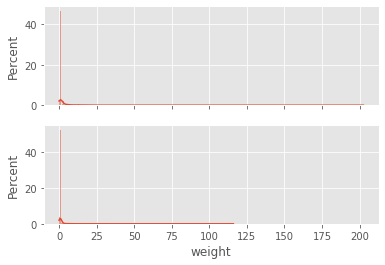

mean label success (grafik atas) : 2.8354075072184792
mean label failed (grafik bawah) : 1.4295965583173995
Ttest_indResult(statistic=-8.70635338508402, pvalue=3.836549755444701e-18)
tolak H0 : mean variable tidak sama 


<Figure size 1440x432 with 0 Axes>

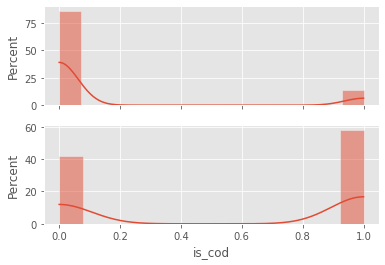

mean label success (grafik atas) : 0.1399422521655438
mean label failed (grafik bawah) : 0.5826959847036329
Ttest_indResult(statistic=43.33893348877586, pvalue=0.0)
tolak H0 : mean variable tidak sama 


<Figure size 1440x432 with 0 Axes>

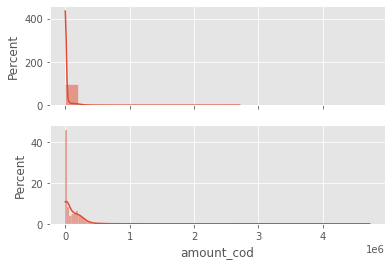

mean label success (grafik atas) : 19555.694128970164
mean label failed (grafik bawah) : 116904.30114722754
Ttest_indResult(statistic=23.949073256365825, pvalue=4.4832975735930096e-122)
tolak H0 : mean variable tidak sama 


<Figure size 1440x432 with 0 Axes>

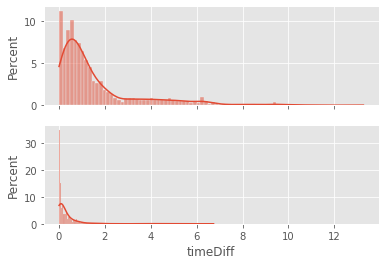

mean label success (grafik atas) : 1.562938723131216
mean label failed (grafik bawah) : 0.364260808370512
Ttest_indResult(statistic=-28.83805614093169, pvalue=2.9021902932370802e-173)
tolak H0 : mean variable tidak sama 


<Figure size 1440x432 with 0 Axes>

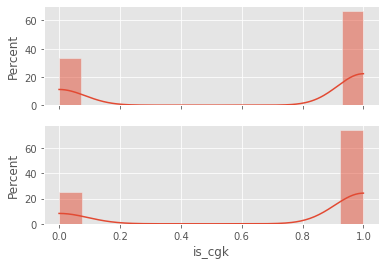

mean label success (grafik atas) : 0.6667949951876805
mean label failed (grafik bawah) : 0.747131931166348
Ttest_indResult(statistic=6.727284574254746, pvalue=1.85961000074985e-11)
tolak H0 : mean variable tidak sama 


<Figure size 1440x432 with 0 Axes>

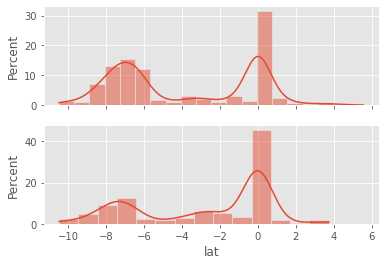

mean label success (grafik atas) : -3.934067697527685
mean label failed (grafik bawah) : -2.7928331608986614
Ttest_indResult(statistic=12.189034727896091, pvalue=7.5843492544369635e-34)
tolak H0 : mean variable tidak sama 


<Figure size 1440x432 with 0 Axes>

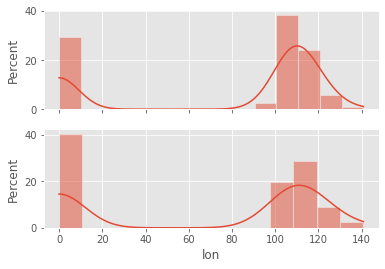

mean label success (grafik atas) : 78.7784189424011
mean label failed (grafik bawah) : 67.04359933843212
Ttest_indResult(statistic=-8.675472601825954, pvalue=5.0210042815018055e-18)
tolak H0 : mean variable tidak sama 


In [268]:
num_col = ['weight', 'is_cod', 'amount_cod', 'timeDiff', 'is_cgk', 'lat', 'lon']
list_col= num_col
for i in list_col :
    plt.figure(figsize=(20,6))
    fig, axes = plt.subplots(2,1,sharex=True)  
    sns.histplot(raw_data[raw_data["taskStatusLabel"]==0][i], kde=True, ax = axes[0],stat='percent')
    sns.histplot(raw_data[raw_data["taskStatusLabel"]==1][i], kde=True, ax = axes[1],stat='percent')
    plt.show()
    yes= raw_data[raw_data['taskStatusLabel']==1]
    no= raw_data[raw_data['taskStatusLabel']==0 ]
    a=ttest_ind(yes[i], no[i])
    print("mean label success (grafik atas) : " +str(statistics.mean(raw_data[raw_data["taskStatusLabel"]==0][i])))
    print("mean label failed (grafik bawah) : " +str(statistics.mean(raw_data[raw_data["taskStatusLabel"]==1][i])))
    print(a)
    if a[1]<0.05 :
        print("tolak H0 : mean variable tidak sama ")
    else:
        print("gagal Tolak H0 : mean variable sama")

In [269]:
tidak_beda=[]
list_col= num_col
for i in list_col :
    yes= raw_data[raw_data['taskStatusLabel']==1]
    no= raw_data[raw_data['taskStatusLabel']==0 ]
    a=ttest_ind(yes[i], no[i])
    if a[1]>= 0.05 :
        tidak_beda.append(i)

In [270]:
num_col

['weight', 'is_cod', 'amount_cod', 'timeDiff', 'is_cgk', 'lat', 'lon']

In [271]:
tidak_beda

[]

In [272]:
num_col = list(set(num_col) - set(tidak_beda))
num_col.sort()
num_col

['amount_cod', 'is_cgk', 'is_cod', 'lat', 'lon', 'timeDiff', 'weight']

In [273]:
len(num_col)

7

### Checking Correlation Value

In [274]:
list_fitur = num_col
cor_data = data_backup.copy()
list_col = list_fitur + ['taskStatusLabel']
cor_data = cor_data[list_col]
cor_data.describe()

,amount_cod,is_cgk,is_cod,lat,lon,timeDiff,weight,taskStatusLabel
count,7.287000e+03,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000
mean,4.750317e+04,0.689859,0.267051,-3.606435,75.409510,1.218814,2.431818,0.287087
std,1.630298e+05,0.462583,0.442450,3.652238,52.503060,1.694256,6.267694,0.452433
min,0.000000e+00,0.000000,0.000000,-10.493658,0.000000,0.004167,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,-7.063881,0.000000,0.165278,1.000000,0.000000
50%,0.000000e+00,1.000000,0.000000,-3.329263,106.843374,0.618333,1.000000,0.000000
75%,2.247350e+04,1.000000,1.000000,0.000000,112.210172,1.366944,1.715000,1.000000
max,4.730000e+06,1.000000,1.000000,5.564040,140.806424,13.266667,202.500000,1.000000


<Axes: >

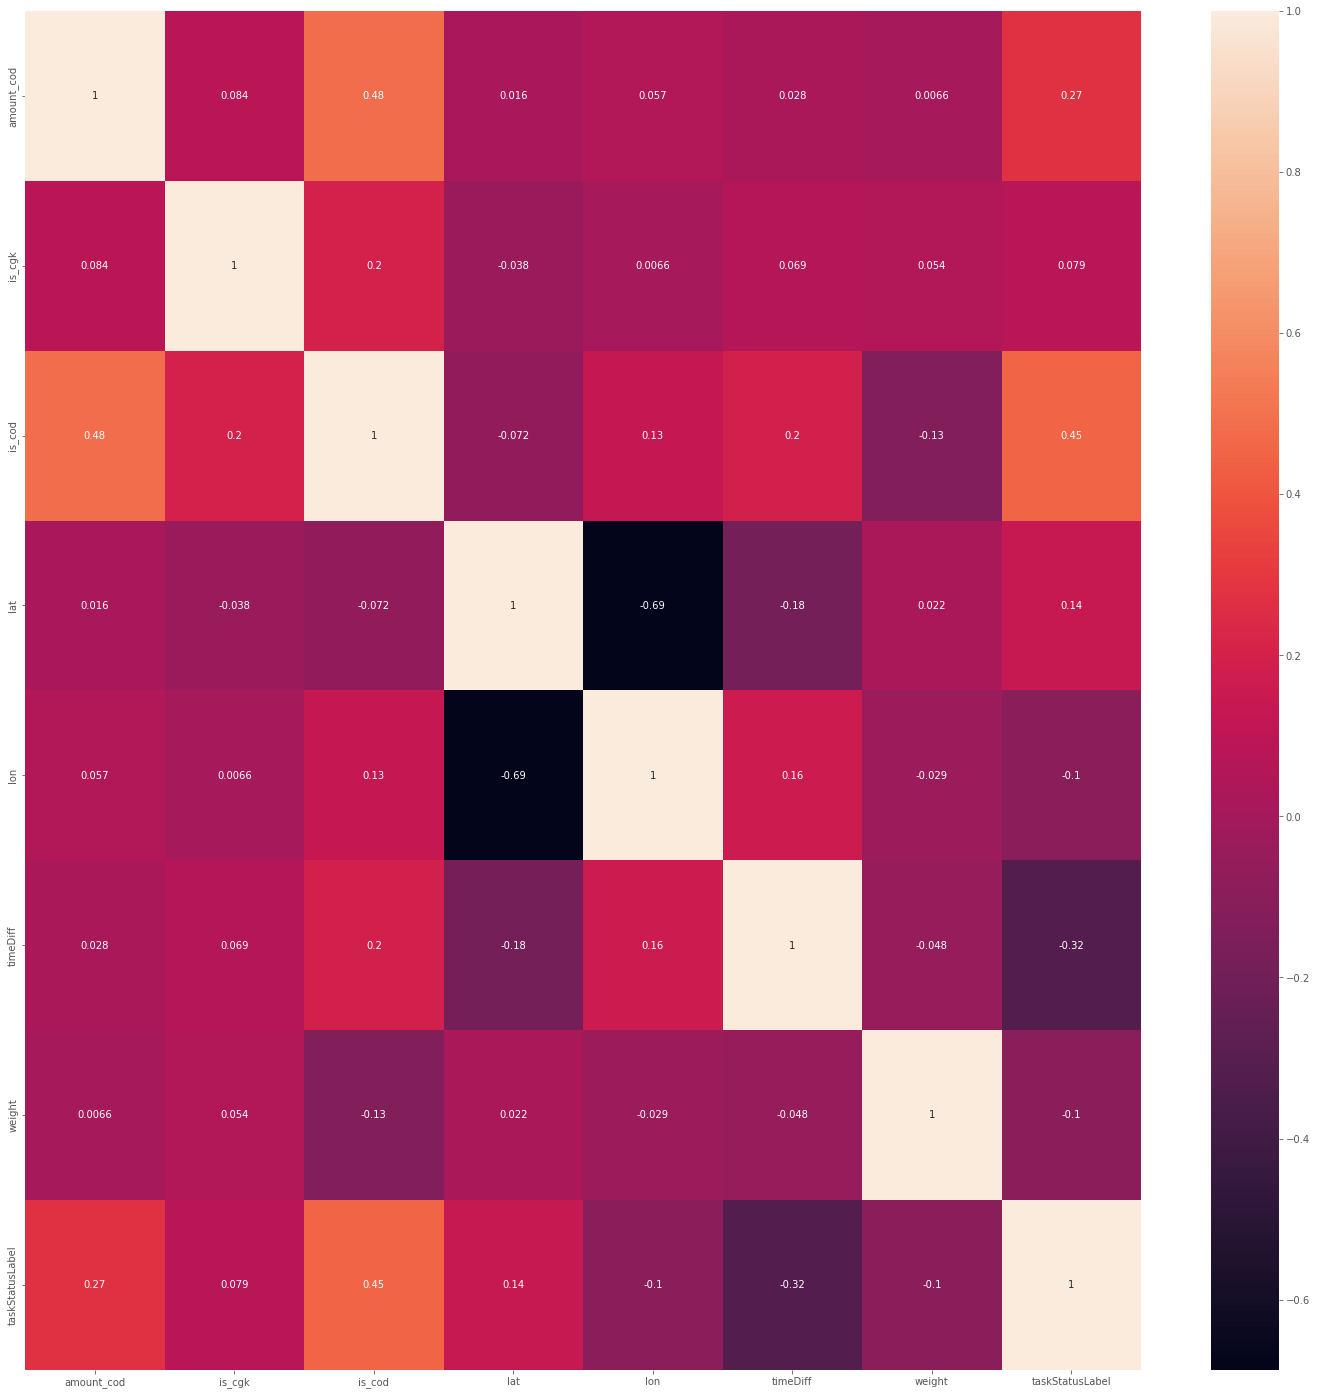

In [275]:
corr = cor_data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True)

we will drop lon and lat, because high correlation and also we can't use single lon lat value as a feature. Better to use branch_origin and branch_dest because it represent origin-destination

In [276]:
num_col.remove('lat')
num_col.remove('lon')
num_col

['amount_cod', 'is_cgk', 'is_cod', 'timeDiff', 'weight']

### Maximum Relevance - Minimum Redundancy method

In [277]:
raw_data = data_backup.copy()
variable = raw_data[num_col]
target = raw_data['taskStatusLabel']

In [278]:
import pandas as pd
from sklearn.feature_selection import f_regression

# inputs:
#    X: pandas.DataFrame, features
#    y: pandas.Series, target variable
#    K: number of features to select

# compute F-statistics and initialize correlation matrix
K=14
F = pd.Series(f_regression(variable, target)[0], index = variable.columns)
corr = pd.DataFrame(.00001, index = variable.columns, columns = variable.columns)

# initialize list of selected features and list of excluded features
selected1 = []
not_selected = variable.columns.to_list()

feature=[]
fscore=[]
multicol=[]
scoremrmr=[]


# repeat K times
for i in range(K):
  
    # compute (absolute) correlations between the last selected feature and all the (currently) excluded features
    if i > 0:
        last_selected = selected1[-1]
        corr.loc[not_selected, last_selected] = variable[not_selected].corrwith(variable[last_selected]).abs().clip(.00001)
        
    # compute FCQ score for all the (currently) excluded features (this is Formula 2)
    score = F.loc[not_selected] / corr.loc[not_selected, selected1].mean(axis = 1).fillna(.00001)
    
    # find best feature, add it to selected and remove it from not_selected
    if len(score) > 0:
        best = score.index[score.argmax()]
        selected1.append(best)
        feature.append(best)
        fscore.append(F.loc[best])
        multicol.append(sum(corr.loc[best, selected1]) / len(corr.loc[best, selected1]))
        scoremrmr.append(max(score))
        not_selected.remove(best)
    else:
        break

In [279]:
import scipy.stats
scipy.stats.f.ppf(q=1-.05, dfn=75, dfd=2571)

1.2886603589676775

In [280]:
num_col

['amount_cod', 'is_cgk', 'is_cod', 'timeDiff', 'weight']

In [281]:
summary=pd.DataFrame({'Feature':feature,'F score':fscore,'Multicolinearity':multicol,'Score MRMR':scoremrmr})
summary.to_csv("MRMR Model1.csv")
summary

,Feature,F score,Multicolinearity,Score MRMR
0,is_cod,1878.263156,0.000010,1.878263e+08
1,timeDiff,831.633482,0.097705,4.256038e+03
2,amount_cod,573.558110,0.170357,2.244580e+03
3,weight,75.800589,0.046767,1.215681e+03
4,is_cgk,45.256358,0.081737,4.429588e+02


### Categorical Column Selection

In [282]:
data_backup.columns

Index(['branch_dest', 'branch_origin', 'weight', 'is_cod', 'amount_cod',
       'received_cod', 'lat', 'lon', 'timeDiff', 'is_cgk', 'taskStatusLabel'],
      dtype='object')

We will not use branh_dest because it already represented by is_cgk

In [283]:
cat_col = ['branch_dest']
cat_col

['branch_dest']

In [284]:
data_obj = data_backup.copy()

In [285]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif

In [286]:
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in data_obj[cat_col]:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(data_obj['taskStatusLabel'], data_obj[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(p)

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

,Feature,p-value
0,branch_dest,1.313087e-301


In [287]:
feature_cat = list(chi2_result[chi2_result['p-value']<0.01]['Feature'])
feature_cat

['branch_dest']

### Fixed Feature

Exclude timeDiff to prevent data leak

In [306]:
feature_num = num_col
feature_num.remove('timeDiff')
fixed_fitur = feature_num + feature_cat + ['taskStatusLabel']
print(len(fixed_fitur))
print(fixed_fitur)

6
['amount_cod', 'is_cgk', 'is_cod', 'weight', 'branch_dest', 'taskStatusLabel']


## Hyperparameter Tuning + Model Training + Model Evaluation in Pipeline

### Hyperparameter Tuning + Model Training + Pipeline setup (Logistic Regression)

In [307]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [308]:
fixed_dataset = data_backup.copy()
fixed_dataset = fixed_dataset[fixed_fitur]
fixed_dataset.head(5)

,amount_cod,is_cgk,is_cod,weight,branch_dest,taskStatusLabel
0,685000.0,1,1,13.000,SRG,0
1,53500.0,1,1,1.300,MGL,0
2,179500.0,1,1,3.000,MGL,0
3,31815.0,1,1,0.625,MGL,0
4,144562.0,1,1,3.000,MGL,0


In [309]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fixed_dataset.drop('taskStatusLabel', axis=1), fixed_dataset['taskStatusLabel'], test_size=0.2, random_state=42)

# Define preprocessing steps for categorical and numerical features
cat_preprocessing = Pipeline([
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

num_preprocessing = Pipeline([
    ('scaler', StandardScaler())
])

# Combine preprocessing steps for all features
preprocessing = ColumnTransformer([
    ('cat', cat_preprocessing, feature_cat),
    ('num', num_preprocessing, feature_num)
])

# Define pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('clf', LogisticRegression(max_iter = 1000))
])

# Define the hyperparameters to tune
param_grid = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': np.logspace(-4, 4, 20),
    'clf__solver': ['liblinear']
}

# Define the scoring metric with pos_label=1
scoring_method = 'recall'

# Create a grid search object with scoring set to 'recall'
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=scoring_method)

# Train the grid search object on the training set
grid_search.fit(X_train, y_train)

# Make predictions on test data
y_pred = grid_search.predict(X_test)

In [310]:
# Evaluate the best hyperparameters on the testing set
y_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Best hyperparameters:", grid_search.best_params_)
print("Test recall:", recall_score(y_test, y_pred))

Best hyperparameters: {'clf__C': 0.615848211066026, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Test recall: 0.7816901408450704


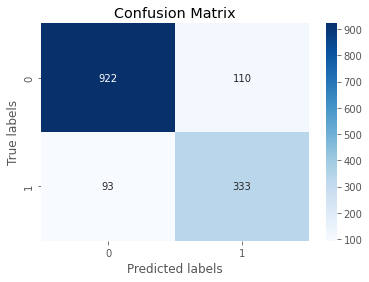

In [311]:
# Visualize the confusion matrix for test data
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [312]:
# Evaluate the best hyperparameters on the train set
y_pred = grid_search.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print("Best hyperparameters:", grid_search.best_params_)
print("Test recall:", recall_score(y_train, y_pred))

Best hyperparameters: {'clf__C': 0.615848211066026, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Test recall: 0.7713085234093637


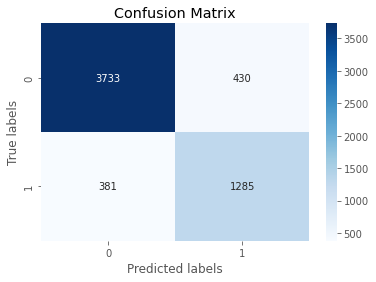

In [313]:
# Visualize the confusion matrix for train data
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

### Model Evaluation

#### Train Data

In [314]:
# Make predictions on the testing set
y_pred = grid_search.predict(X_train)
y_prob = grid_search.predict_proba(X_train)[:, 1]

# Evaluate the model using various metrics
print("Accuracy: ", accuracy_score(y_train, y_pred))
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))
print("F1-score: ", f1_score(y_train, y_pred))
print("ROC AUC score: ", roc_auc_score(y_train, y_pred))

Accuracy:  0.8608680734259736
Precision:  0.749271137026239
Recall:  0.7713085234093637
F1-score:  0.7601301390121266
ROC AUC score:  0.834008813710447


Text(0.5, 1.0, 'Precision-Recall Curve')

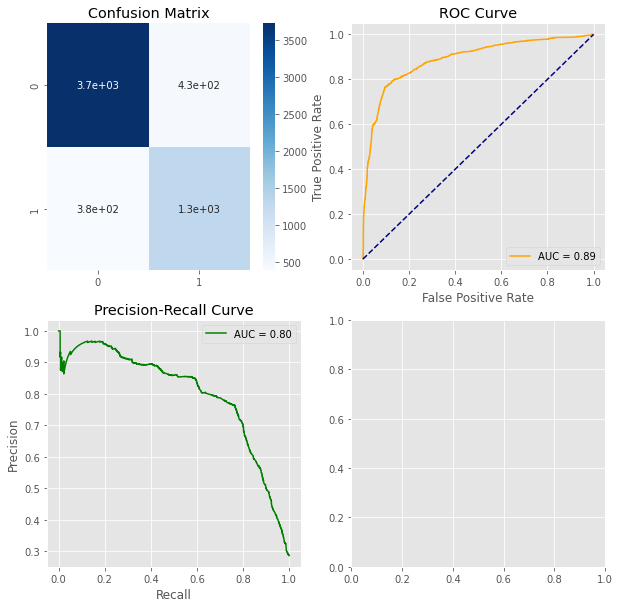

In [315]:
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = roc_auc_score(y_train, y_prob)

# Compute the precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_train, y_prob)
pr_auc = auc(recall, precision)

# Visualize the results
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[0, 0])
ax[0, 0].set_title('Confusion Matrix')

# Plot the ROC curve
ax[0, 1].plot(fpr, tpr, color='orange', label='AUC = %0.2f' % roc_auc)
ax[0, 1].plot([0, 1], [0, 1], color='navy', linestyle='--')
ax[0, 1].set_xlabel('False Positive Rate')
ax[0, 1].set_ylabel('True Positive Rate')
ax[0, 1].legend(loc='lower right')
ax[0, 1].set_title('ROC Curve')

# Plot the precision-recall curve
ax[1, 0].plot(recall, precision, color='green', label='AUC = %0.2f' % pr_auc)
ax[1, 0].set_xlabel('Recall')
ax[1, 0].set_ylabel('Precision')
ax[1, 0].legend(loc='upper right')
ax[1, 0].set_title('Precision-Recall Curve')

#### Test Data

In [316]:
# Make predictions on the testing set
y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)[:, 1]

# Evaluate the model using various metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred))
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

Accuracy:  0.8607681755829903
Precision:  0.7516930022573364
Recall:  0.7816901408450704
F1-score:  0.766398158803222
ROC AUC score:  0.8375504967791244


Text(0.5, 1.0, 'Precision-Recall Curve')

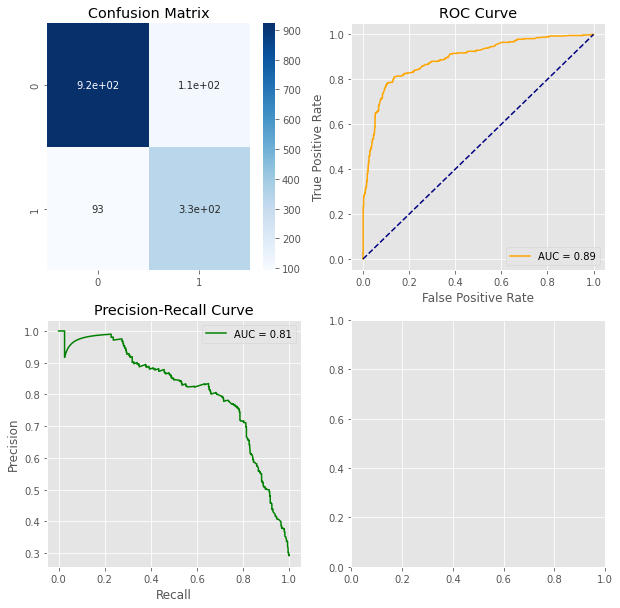

In [317]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Compute the precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Visualize the results
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[0, 0])
ax[0, 0].set_title('Confusion Matrix')

# Plot the ROC curve
ax[0, 1].plot(fpr, tpr, color='orange', label='AUC = %0.2f' % roc_auc)
ax[0, 1].plot([0, 1], [0, 1], color='navy', linestyle='--')
ax[0, 1].set_xlabel('False Positive Rate')
ax[0, 1].set_ylabel('True Positive Rate')
ax[0, 1].legend(loc='lower right')
ax[0, 1].set_title('ROC Curve')

# Plot the precision-recall curve
ax[1, 0].plot(recall, precision, color='green', label='AUC = %0.2f' % pr_auc)
ax[1, 0].set_xlabel('Recall')
ax[1, 0].set_ylabel('Precision')
ax[1, 0].legend(loc='upper right')
ax[1, 0].set_title('Precision-Recall Curve')

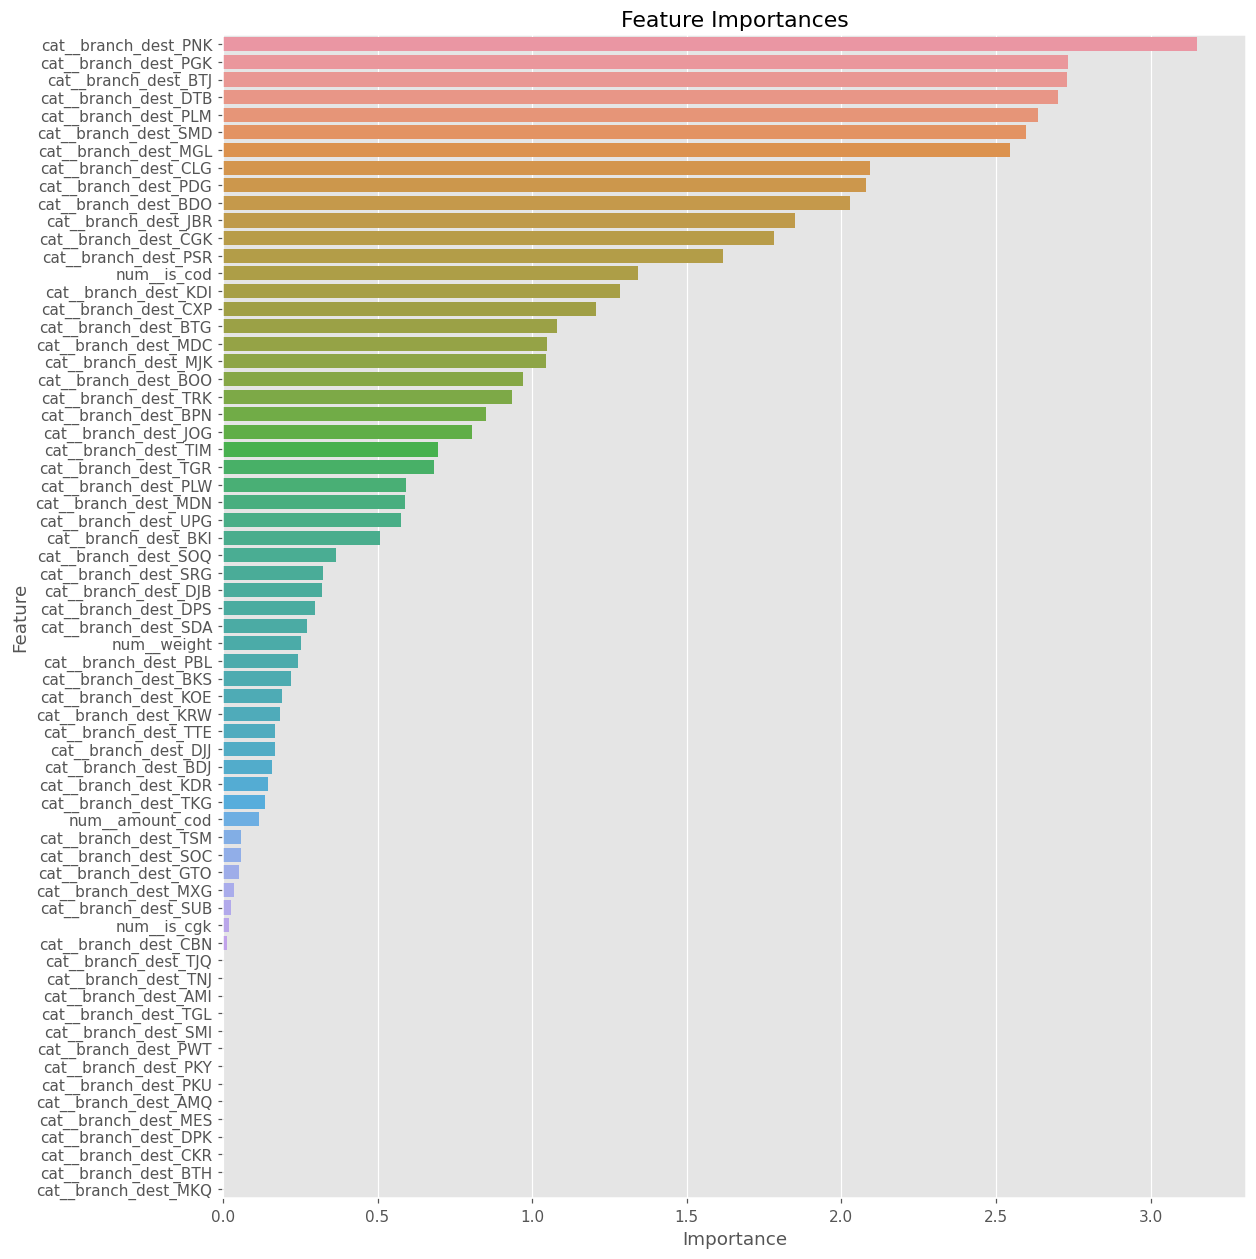

In [318]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Get the feature names from the transformed data
feature_names = best_estimator.named_steps['preprocessing'].get_feature_names_out()

# Get the coefficients and feature importances
coefficients = best_estimator.named_steps['clf'].coef_
importances = np.abs(coefficients)

# Create a dataframe of the feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances[0]})

# Sort the dataframe by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 14), dpi = 110)
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##### Bin Proba Analysis

In [319]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print(optimal_threshold)

0.4964571760777488


In [320]:
X_test["PREDICT"] = y_pred
X_test["PROBA"] = y_prob
X_test["FLAG_FAIL_REAL"] = np.array(y_test)

In [321]:
min_max_df = X_test.groupby('PREDICT')['PROBA'].agg(['min', 'max'])
print(min_max_df)

              min       max
PREDICT                    
0        0.000250  0.496457
1        0.506517  0.996933


In [322]:
min_max_df = X_test.groupby('FLAG_FAIL_REAL')['PROBA'].agg(['min', 'max'])
print(min_max_df)

                    min       max
FLAG_FAIL_REAL                   
0               0.00025  0.981119
1               0.00622  0.996933


In [323]:
X_test[X_test['FLAG_FAIL_REAL']==1]["PROBA"].describe()

count    426.000000
mean       0.629608
std        0.279399
min        0.006220
25%        0.566484
50%        0.695930
75%        0.831082
max        0.996933
Name: PROBA, dtype: float64

In [324]:
X_test[X_test['FLAG_FAIL_REAL']==0]["PROBA"].describe()

count    1032.000000
mean        0.161723
std         0.190842
min         0.000250
25%         0.052048
50%         0.089870
75%         0.186182
max         0.981119
Name: PROBA, dtype: float64

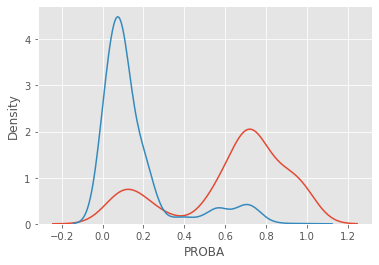

In [325]:
sns.kdeplot(X_test[X_test['FLAG_FAIL_REAL']==1]["PROBA"])
sns.kdeplot(X_test[X_test['FLAG_FAIL_REAL']==0]["PROBA"])
plt.show()

In [326]:
bins = [0, 0.49, 1]

X_test['binned'] = pd.cut(X_test['PROBA'], bins)

test_binned = X_test.groupby('binned').agg({"PREDICT":['count', 'sum', 'mean']})
test_binned.columns = ['Count_User', 'Count_Bad', 'Average_Bad']
test_binned["Cum_Approved"] = test_binned["Count_User"].cumsum()
test_binned["Cum_Rejection"] = test_binned["Count_User"].sum() - test_binned["Cum_Approved"]
test_binned["Cum_Bad"] = test_binned["Count_Bad"].cumsum()
test_binned["Approval_Rate"] = 100 * test_binned["Cum_Approved"]/test_binned["Count_User"].sum()
test_binned["Rejection_Rate"] = 100 * test_binned["Cum_Rejection"]/test_binned["Count_User"].sum()
test_binned["Bad_Rate"] = 100 * test_binned["Cum_Bad"]/test_binned["Cum_Approved"]

# test_binned.to_csv('test_8_bin.csv')
test_binned

,Count_User,Count_Bad,Average_Bad,Cum_Approved,Cum_Rejection,Cum_Bad,Approval_Rate,Rejection_Rate,Bad_Rate
binned,,,,,,,,,
"(0.0, 0.49]",1014,0,0.000000,1014,444,0,69.547325,30.452675,0.000000
"(0.49, 1.0]",444,443,0.997748,1458,0,443,100.000000,0.000000,30.384088


In [327]:
bins = [0, 0.49, 1]

X_test['binned'] = pd.cut(X_test['PROBA'], bins)

test_binned = X_test.groupby('binned').agg({"FLAG_FAIL_REAL":['count', 'sum', 'mean']})
test_binned.columns = ['Count_User', 'Count_Bad', 'Average_Bad']
test_binned["Cum_Approved"] = test_binned["Count_User"].cumsum()
test_binned["Cum_Rejection"] = test_binned["Count_User"].sum() - test_binned["Cum_Approved"]
test_binned["Cum_Bad"] = test_binned["Count_Bad"].cumsum()
test_binned["Approval_Rate"] = 100 * test_binned["Cum_Approved"]/test_binned["Count_User"].sum()
test_binned["Rejection_Rate"] = 100 * test_binned["Cum_Rejection"]/test_binned["Count_User"].sum()
test_binned["Bad_Rate"] = 100 * test_binned["Cum_Bad"]/test_binned["Cum_Approved"]

# test_binned.to_csv('test_8_bin.csv')
test_binned

,Count_User,Count_Bad,Average_Bad,Cum_Approved,Cum_Rejection,Cum_Bad,Approval_Rate,Rejection_Rate,Bad_Rate
binned,,,,,,,,,
"(0.0, 0.49]",1014,92,0.090730,1014,444,92,69.547325,30.452675,9.072978
"(0.49, 1.0]",444,334,0.752252,1458,0,426,100.000000,0.000000,29.218107


In [328]:
X_test['binned'] = pd.qcut(X_test['PROBA'], q=3)

# bin_for_proba = [0, 0.29, 0.5, 1]

test_binned = X_test.groupby('binned').agg({"FLAG_FAIL_REAL":['count', 'sum', 'mean']})
test_binned.columns = ['Count_User', 'Count_Bad', 'Average_Bad']
test_binned["Cum_Approved"] = test_binned["Count_User"].cumsum()
test_binned["Cum_Rejection"] = test_binned["Count_User"].sum() - test_binned["Cum_Approved"]
test_binned["Cum_Bad"] = test_binned["Count_Bad"].cumsum()
test_binned["Approval_Rate"] = 100 * test_binned["Cum_Approved"]/test_binned["Count_User"].sum()
test_binned["Rejection_Rate"] = 100 * test_binned["Cum_Rejection"]/test_binned["Count_User"].sum()
test_binned["Bad_Rate"] = 100 * test_binned["Cum_Bad"]/test_binned["Cum_Approved"]

# test_binned.to_csv('test_8_bin.csv')
test_binned

,Count_User,Count_Bad,Average_Bad,Cum_Approved,Cum_Rejection,Cum_Bad,Approval_Rate,Rejection_Rate,Bad_Rate
binned,,,,,,,,,
"(-0.00075, 0.0877]",486,24,0.049383,486,972,24,33.333333,66.666667,4.938272
"(0.0877, 0.261]",490,59,0.120408,976,482,83,66.941015,33.058985,8.504098
"(0.261, 0.997]",482,343,0.711618,1458,0,426,100.000000,0.000000,29.218107


## Export Model

In [329]:
import joblib

# Export the grid search object as a pickle file
joblib.dump(grid_search, 'model_fail_task_prediction_logreg.pkl')

['model_fail_task_prediction_logreg.pkl']

In [330]:
# Load the grid search object from the pickle file
grid_search_loaded = joblib.load('model_fail_task_prediction_logreg.pkl')

In [331]:
# Make predictions on the testing set
y_pred = grid_search_loaded.predict(X_test)
y_prob = grid_search_loaded.predict_proba(X_test)[:, 1]

# Evaluate the model using various metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred))
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

Accuracy:  0.8607681755829903
Precision:  0.7516930022573364
Recall:  0.7816901408450704
F1-score:  0.766398158803222
ROC AUC score:  0.8375504967791244


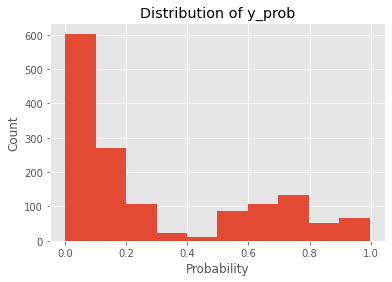

In [332]:
# Plot histogram of y_prob
plt.hist(y_prob, bins=10)
plt.title('Distribution of y_prob')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()

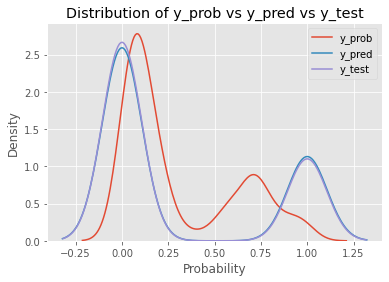

In [333]:
# Plot density plot of y_prob
sns.kdeplot(y_prob, label='y_prob')
sns.kdeplot(y_pred, label='y_pred')
sns.kdeplot(y_test, label='y_test')
plt.title('Distribution of y_prob vs y_pred vs y_test')
plt.xlabel('Probability')
plt.legend()
plt.show()

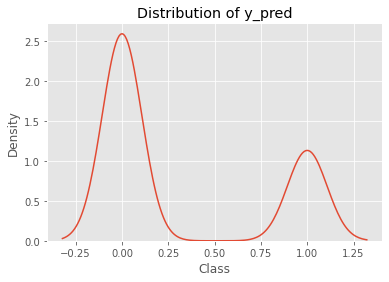

In [334]:
# Plot density plot of y_pred
sns.kdeplot(y_pred)
plt.title('Distribution of y_pred')
plt.xlabel('Class')
plt.show()

### Hyperparameter Tuning + Model Training + Pipeline setup (Random Forest)

In [335]:
from sklearn.ensemble import RandomForestClassifier

In [336]:
fixed_dataset = data_backup.copy()
fixed_dataset = fixed_dataset[fixed_fitur]
fixed_dataset.head(5)

,amount_cod,is_cgk,is_cod,weight,branch_dest,taskStatusLabel
0,685000.0,1,1,13.000,SRG,0
1,53500.0,1,1,1.300,MGL,0
2,179500.0,1,1,3.000,MGL,0
3,31815.0,1,1,0.625,MGL,0
4,144562.0,1,1,3.000,MGL,0


In [337]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fixed_dataset.drop('taskStatusLabel', axis=1), fixed_dataset['taskStatusLabel'], test_size=0.2, random_state=42)

# Define preprocessing steps for categorical and numerical features
cat_preprocessing = Pipeline([
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

num_preprocessing = Pipeline([
    ('scaler', StandardScaler())
])

# Combine preprocessing steps for all features
preprocessing = ColumnTransformer([
    ('cat', cat_preprocessing, feature_cat),
    ('num', num_preprocessing, feature_num)
])

# Define pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('clf', RandomForestClassifier())
])

# Define the hyperparameters to tune
param_grid = {
    'clf__n_estimators': [100, 200, 500],  # Number of trees
    'clf__max_depth': [None, 5, 10],  # Maximum depth of each tree
    'clf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'clf__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Define the scoring metric with pos_label=1
scoring_method = 'recall'

# Create a grid search object with scoring set to 'recall'
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=scoring_method)

# Train the grid search object on the training set
grid_search.fit(X_train, y_train)

# Make predictions on test data
y_pred = grid_search.predict(X_test)

In [338]:
# Evaluate the best hyperparameters on the testing set
y_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Best hyperparameters:", grid_search.best_params_)
print("Test recall:", recall_score(y_test, y_pred))

Best hyperparameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 5, 'clf__n_estimators': 500}
Test recall: 0.7394366197183099


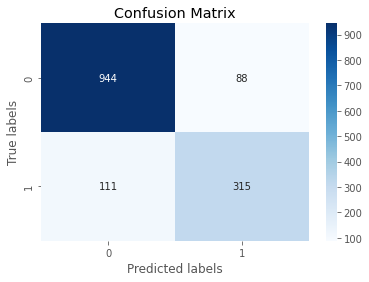

In [339]:
# Visualize the confusion matrix for test data
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [340]:
# Evaluate the best hyperparameters on the train set
y_pred = grid_search.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print("Best hyperparameters:", grid_search.best_params_)
print("Test recall:", recall_score(y_train, y_pred))

Best hyperparameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 5, 'clf__n_estimators': 500}
Test recall: 0.7460984393757503


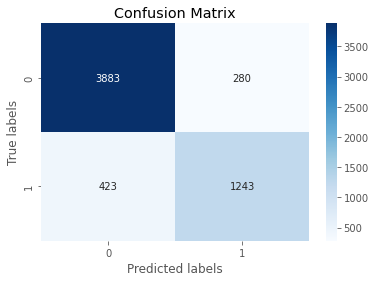

In [341]:
# Visualize the confusion matrix for train data
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

### Model Evaluation

#### Train Data

In [342]:
# Make predictions on the testing set
y_pred = grid_search.predict(X_train)
y_prob = grid_search.predict_proba(X_train)[:, 1]

# Evaluate the model using various metrics
print("Accuracy: ", accuracy_score(y_train, y_pred))
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))
print("F1-score: ", f1_score(y_train, y_pred))
print("ROC AUC score: ", roc_auc_score(y_train, y_pred))

Accuracy:  0.8793961228341053
Precision:  0.8161523309258043
Recall:  0.7460984393757503
F1-score:  0.7795547193477579
ROC AUC score:  0.8394196256451175


Text(0.5, 1.0, 'Precision-Recall Curve')

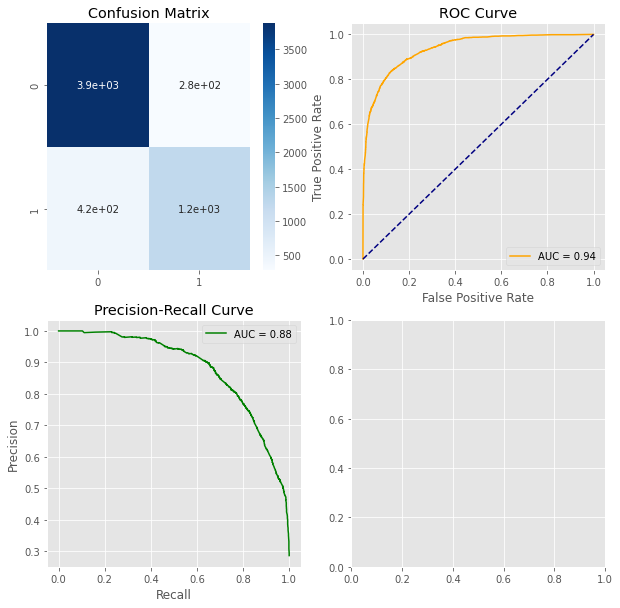

In [343]:
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = roc_auc_score(y_train, y_prob)

# Compute the precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_train, y_prob)
pr_auc = auc(recall, precision)

# Visualize the results
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[0, 0])
ax[0, 0].set_title('Confusion Matrix')

# Plot the ROC curve
ax[0, 1].plot(fpr, tpr, color='orange', label='AUC = %0.2f' % roc_auc)
ax[0, 1].plot([0, 1], [0, 1], color='navy', linestyle='--')
ax[0, 1].set_xlabel('False Positive Rate')
ax[0, 1].set_ylabel('True Positive Rate')
ax[0, 1].legend(loc='lower right')
ax[0, 1].set_title('ROC Curve')

# Plot the precision-recall curve
ax[1, 0].plot(recall, precision, color='green', label='AUC = %0.2f' % pr_auc)
ax[1, 0].set_xlabel('Recall')
ax[1, 0].set_ylabel('Precision')
ax[1, 0].legend(loc='upper right')
ax[1, 0].set_title('Precision-Recall Curve')

#### Test Data

In [344]:
# Make predictions on the testing set
y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)[:, 1]

# Evaluate the model using various metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred))
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

Accuracy:  0.8635116598079561
Precision:  0.7816377171215881
Recall:  0.7394366197183099
F1-score:  0.7599517490952955
ROC AUC score:  0.8270826509444262


Text(0.5, 1.0, 'Precision-Recall Curve')

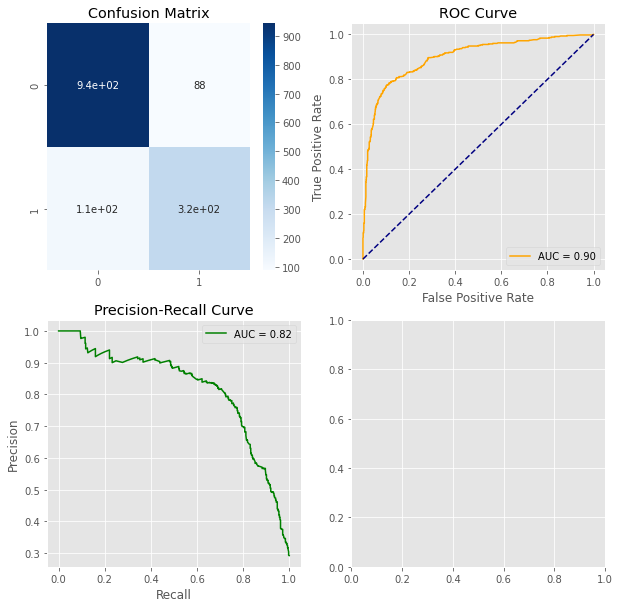

In [345]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Compute the precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Visualize the results
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[0, 0])
ax[0, 0].set_title('Confusion Matrix')

# Plot the ROC curve
ax[0, 1].plot(fpr, tpr, color='orange', label='AUC = %0.2f' % roc_auc)
ax[0, 1].plot([0, 1], [0, 1], color='navy', linestyle='--')
ax[0, 1].set_xlabel('False Positive Rate')
ax[0, 1].set_ylabel('True Positive Rate')
ax[0, 1].legend(loc='lower right')
ax[0, 1].set_title('ROC Curve')

# Plot the precision-recall curve
ax[1, 0].plot(recall, precision, color='green', label='AUC = %0.2f' % pr_auc)
ax[1, 0].set_xlabel('Recall')
ax[1, 0].set_ylabel('Precision')
ax[1, 0].legend(loc='upper right')
ax[1, 0].set_title('Precision-Recall Curve')

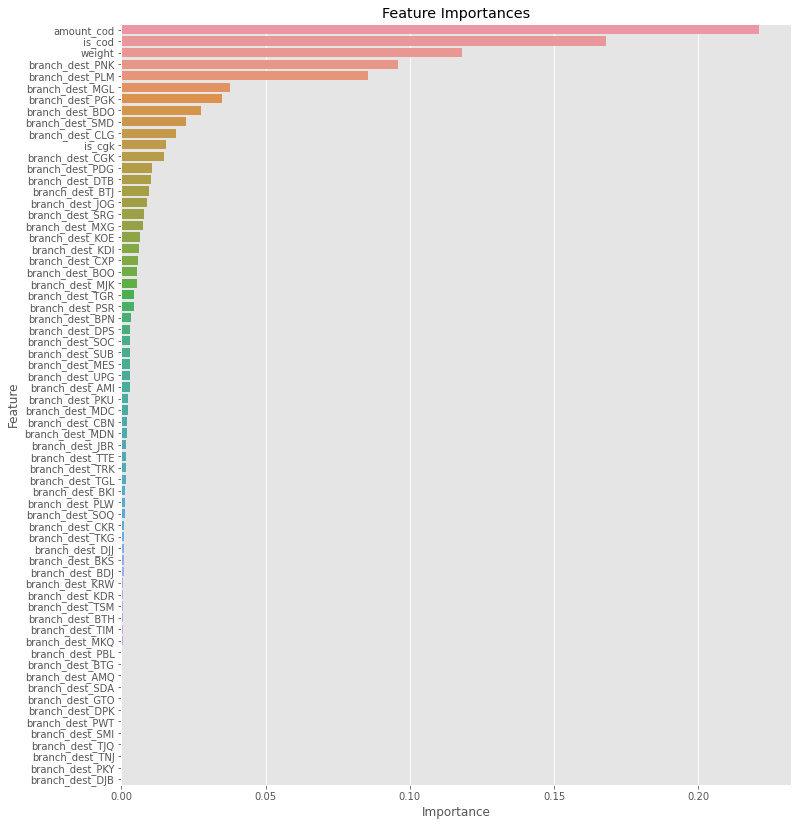

In [346]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Get the feature names from the transformed data
feature_names_cat = best_estimator.named_steps['preprocessing'].named_transformers_['cat'].named_steps['one_hot_encoder'].get_feature_names_out()
feature_names_num = best_estimator.named_steps['preprocessing'].named_transformers_['num'].named_steps['scaler'].get_feature_names_out()
feature_names = np.concatenate([feature_names_cat, feature_names_num])

# Get the feature importances
importances = best_estimator.named_steps['clf'].feature_importances_

# Create a dataframe of the feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 14))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##### Bin Proba Analysis

In [347]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print(optimal_threshold)

0.3869896710747425


In [348]:
X_test["PREDICT"] = y_pred
X_test["PROBA"] = y_prob
X_test["FLAG_FAIL_REAL"] = np.array(y_test)

In [349]:
min_max_df = X_test.groupby('PREDICT')['PROBA'].agg(['min', 'max'])
print(min_max_df)

              min       max
PREDICT                    
0        0.004467  0.496552
1        0.509061  0.985037


In [350]:
min_max_df = X_test.groupby('FLAG_FAIL_REAL')['PROBA'].agg(['min', 'max'])
print(min_max_df)

                     min       max
FLAG_FAIL_REAL                    
0               0.004467  0.941443
1               0.004467  0.985037


In [351]:
X_test[X_test['FLAG_FAIL_REAL']==1]["PROBA"].describe()

count    426.000000
mean       0.637398
std        0.285405
min        0.004467
25%        0.474932
50%        0.715672
75%        0.865114
max        0.985037
Name: PROBA, dtype: float64

In [352]:
X_test[X_test['FLAG_FAIL_REAL']==0]["PROBA"].describe()

count    1032.000000
mean        0.153467
std         0.191200
min         0.004467
25%         0.028307
50%         0.075618
75%         0.197315
max         0.941443
Name: PROBA, dtype: float64

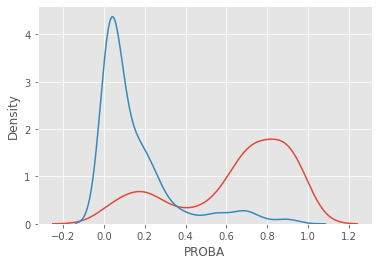

In [353]:
sns.kdeplot(X_test[X_test['FLAG_FAIL_REAL']==1]["PROBA"])
sns.kdeplot(X_test[X_test['FLAG_FAIL_REAL']==0]["PROBA"])
plt.show()

In [354]:
bins = [0, 0.38, 0.5, 1]

X_test['binned'] = pd.cut(X_test['PROBA'], bins)

test_binned = X_test.groupby('binned').agg({"PREDICT":['count', 'sum', 'mean']})
test_binned.columns = ['Count_User', 'Count_Bad', 'Average_Bad']
test_binned["Cum_Approved"] = test_binned["Count_User"].cumsum()
test_binned["Cum_Rejection"] = test_binned["Count_User"].sum() - test_binned["Cum_Approved"]
test_binned["Cum_Bad"] = test_binned["Count_Bad"].cumsum()
test_binned["Approval_Rate"] = 100 * test_binned["Cum_Approved"]/test_binned["Count_User"].sum()
test_binned["Rejection_Rate"] = 100 * test_binned["Cum_Rejection"]/test_binned["Count_User"].sum()
test_binned["Bad_Rate"] = 100 * test_binned["Cum_Bad"]/test_binned["Cum_Approved"]

# test_binned.to_csv('test_8_bin.csv')
test_binned

,Count_User,Count_Bad,Average_Bad,Cum_Approved,Cum_Rejection,Cum_Bad,Approval_Rate,Rejection_Rate,Bad_Rate
binned,,,,,,,,,
"(0.0, 0.38]",1019,0,0.0,1019,439,0,69.890261,30.109739,0.000000
"(0.38, 0.5]",36,0,0.0,1055,403,0,72.359396,27.640604,0.000000
"(0.5, 1.0]",403,403,1.0,1458,0,403,100.000000,0.000000,27.640604


In [355]:
bins = [0, 0.38, 0.5, 1]

X_test['binned'] = pd.cut(X_test['PROBA'], bins)

test_binned = X_test.groupby('binned').agg({"FLAG_FAIL_REAL":['count', 'sum', 'mean']})
test_binned.columns = ['Count_User', 'Count_Bad', 'Average_Bad']
test_binned["Cum_Approved"] = test_binned["Count_User"].cumsum()
test_binned["Cum_Rejection"] = test_binned["Count_User"].sum() - test_binned["Cum_Approved"]
test_binned["Cum_Bad"] = test_binned["Count_Bad"].cumsum()
test_binned["Approval_Rate"] = 100 * test_binned["Cum_Approved"]/test_binned["Count_User"].sum()
test_binned["Rejection_Rate"] = 100 * test_binned["Cum_Rejection"]/test_binned["Count_User"].sum()
test_binned["Bad_Rate"] = 100 * test_binned["Cum_Bad"]/test_binned["Cum_Approved"]

# test_binned.to_csv('test_8_bin.csv')
test_binned

,Count_User,Count_Bad,Average_Bad,Cum_Approved,Cum_Rejection,Cum_Bad,Approval_Rate,Rejection_Rate,Bad_Rate
binned,,,,,,,,,
"(0.0, 0.38]",1019,96,0.094210,1019,439,96,69.890261,30.109739,9.421001
"(0.38, 0.5]",36,15,0.416667,1055,403,111,72.359396,27.640604,10.521327
"(0.5, 1.0]",403,315,0.781638,1458,0,426,100.000000,0.000000,29.218107


In [356]:
X_test['binned'] = pd.qcut(X_test['PROBA'], q=3)

# bin_for_proba = [0, 0.38, 0.5, 1]

test_binned = X_test.groupby('binned').agg({"FLAG_FAIL_REAL":['count', 'sum', 'mean']})
test_binned.columns = ['Count_User', 'Count_Bad', 'Average_Bad']
test_binned["Cum_Approved"] = test_binned["Count_User"].cumsum()
test_binned["Cum_Rejection"] = test_binned["Count_User"].sum() - test_binned["Cum_Approved"]
test_binned["Cum_Bad"] = test_binned["Count_Bad"].cumsum()
test_binned["Approval_Rate"] = 100 * test_binned["Cum_Approved"]/test_binned["Count_User"].sum()
test_binned["Rejection_Rate"] = 100 * test_binned["Cum_Rejection"]/test_binned["Count_User"].sum()
test_binned["Bad_Rate"] = 100 * test_binned["Cum_Bad"]/test_binned["Cum_Approved"]

# test_binned.to_csv('test_8_bin.csv')
test_binned

,Count_User,Count_Bad,Average_Bad,Cum_Approved,Cum_Rejection,Cum_Bad,Approval_Rate,Rejection_Rate,Bad_Rate
binned,,,,,,,,,
"(0.00347, 0.0623]",488,18,0.036885,488,970,18,33.470508,66.529492,3.688525
"(0.0623, 0.289]",485,69,0.142268,973,485,87,66.735254,33.264746,8.941418
"(0.289, 0.985]",485,339,0.698969,1458,0,426,100.000000,0.000000,29.218107


## Export Model

In [357]:
import joblib

# Export the grid search object as a pickle file
joblib.dump(grid_search, 'model_fail_task_prediction_random_forest.pkl')

['model_fail_task_prediction_random_forest.pkl']

In [358]:
# Load the grid search object from the pickle file
grid_search_loaded = joblib.load('model_fail_task_prediction_random_forest.pkl')

In [359]:
# Make predictions on the testing set
y_pred = grid_search_loaded.predict(X_test)
y_prob = grid_search_loaded.predict_proba(X_test)[:, 1]

# Evaluate the model using various metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred))
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

Accuracy:  0.8635116598079561
Precision:  0.7816377171215881
Recall:  0.7394366197183099
F1-score:  0.7599517490952955
ROC AUC score:  0.8270826509444262


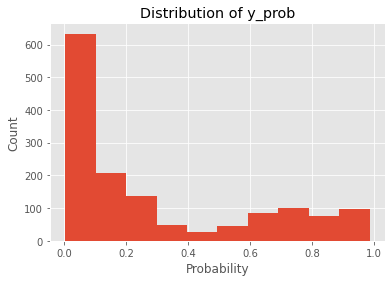

In [360]:
# Plot histogram of y_prob
plt.hist(y_prob, bins=10)
plt.title('Distribution of y_prob')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()

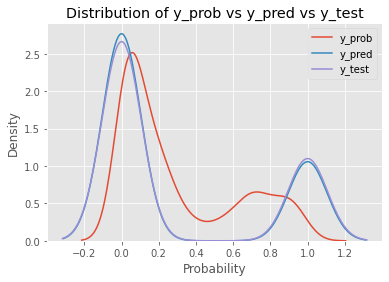

In [361]:
# Plot density plot of y_prob
sns.kdeplot(y_prob, label='y_prob')
sns.kdeplot(y_pred, label='y_pred')
sns.kdeplot(y_test, label='y_test')
plt.title('Distribution of y_prob vs y_pred vs y_test')
plt.xlabel('Probability')
plt.legend()
plt.show()

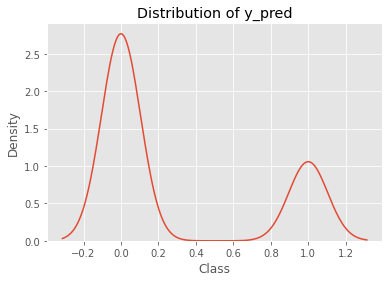

In [362]:
# Plot density plot of y_pred
sns.kdeplot(y_pred)
plt.title('Distribution of y_pred')
plt.xlabel('Class')
plt.show()